{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


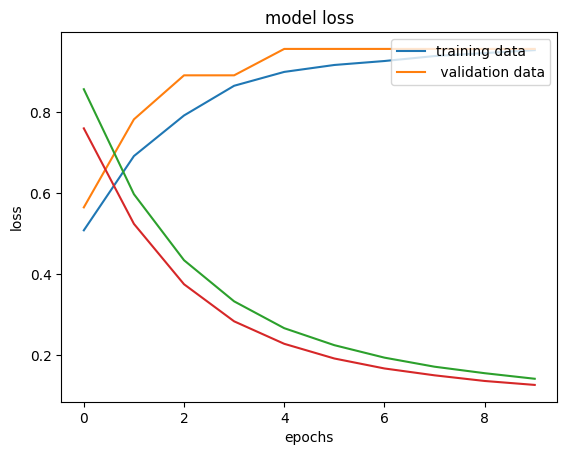

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets #provides function for various purposes to fetch and load data


from sklearn.model_selection import train_test_split

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset) #in the form of dictionary

#malignant tumors are seroius and cancerous
#feature names are the names of the columns

#loading data into the data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

#printing the first 5 rows of the data frame
print(data_frame.head()) #get info that there are 5 rows and 30 columns

#adding the 'target' column to the data frame by the column 'label'
data_frame['label'] = breast_cancer_dataset.target

#printing the last 5 rows of the data frame
print(data_frame.tail())

#printing the number of rows and columns in the data_frame
print(data_frame.shape)

#getting some info about the data like how many null values are there and what is the datatype of those values in the column

#checking how many missing values are there in each column
print(data_frame.isnull().sum())

#checking the distribution of the target variable i.e how many are malignant and how many are non-malignant?
print(data_frame['label'].value_counts()) #here there are 357 values negative for malignant and 212 values positive for malignant

#getting the mean values for each of the target value under different columns
print(data_frame.groupby('label').mean())

#seperating the feature and targets
X = data_frame.drop(columns = 'label', axis = 1) #if u want to drop a column mention axis as 1
Y = data_frame['label']


print(X)
print(Y)

#splitting our data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

print(X.shape, X_train.shape, X_test.shape)

#standardising data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#building the neural network
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3) # used to generate random numbers and the 3 signifies that if you want the same randomness you specify with a specific value here it is 3
from tensorflow import keras #keras is a neural network API

#building different layers - input layer, hidden layer and output layer
model = keras.Sequential([keras.layers.Flatten(input_shape = (30,)),
keras.layers.Dense(25, activation = 'relu'), #here 20 represents the number of neuronsand relu is the activation function
keras.layers.Dense(2, activation='sigmoid') #here 2 is the number of neurons and sigmoid is the activation function
                          ]) #FLatten will flatten the input layer that is convert convert them into a 1D array Eg the input layer is a 2D image with shape(28,28) the Flatten layer will transform it into a 1D array of size 28*28 = 784. Dense Layer(Hidden Layer) This is a fully connected Layer with 128 units and ReLU activation. Dense Layer(Output Layer) This is another fully connected Layer with softmax activation. It is commonly used in classification problems with mulitiple classes. The softmax activation function normalizes the output into a probability distribution over the 10 classes. Number of input Layer is equal to the number of feature_names
# the number of neurons in the output layer is equal to the number of classes we have (i.e 0 and 1) here its 2

#compiling our neural network with factors like optimizers loss etc
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy']) #loss='sparse_categorical_crossentropy' in the configuration of a neural network model, it means that the model is being trained using the sparse categorical cross-entropy loss. The model is likely designed for a classification task where the labels are integers representing class indices, and the network is expected to output a probability distribution over the classes for each input sample.  you want to monitor and report the accuracy during the training process. The accuracy is a commonly used evaluation metric for classification tasks and is defined as the ratio of correctly predicted samples to the total number of samples.

#training the neural network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

#visualizing accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data','validation data'], loc = 'lower right')


#plotting it for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training data',' validation data'], loc = 'upper right')

#getting the accuracy of the model on test data
#X_test are the values predicted by the model and Y_test are the actual values it will compare with
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)
print(loss)

# print(X_test_std.shape)
# print(X_test_std[0])


Y_pred = model.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0]) #first value represents what is the probability that the value is 0 and the second value represents what is the probability that the value is 1

print(X_test_std)
print(Y_pred) #will return a list of 2 values for each data. If we want the first one to be a maximum we will mention the label as 0 and if we want the second one to be a maximum we will mention the label as 1

#but we want labels not probabilities of how much this value is close to 1 and how much close is this value close to 0
#model.predict() here gives the prediction probability of each class for that data point

#converting the prediciton probability to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred] #np.argmax(i): For each row (i) in Y_pred, np.argmax(i) returns the index of the maximum value in that row. In other words, it identifies the class with the highest predicted probability. [np.argmax(i) for i in Y_pred]: This list comprehension iterates over each row in Y_pred and builds a new list containing the indices of the maximum values in each row. This effectively converts the predicted probabilities into class labels.

print(Y_pred_labels)

#building the predictive system
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

#change the input data into numpy array
#reshaping the input data using numpy array
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #reshapes this array into a 2 Dimensional array with 1 row and variying number of columns. The 1 here stands for 1 row and the -1 indicates to assign number of columns based on the number of elements in the original array

#standardising the input data
input_data_std = scaler.transform(input_data_reshaped) #we need to fit it with only training data

prediction = model.predict(input_data_std) #this will give us prediction probability and not classes as either 0 or 1
print(prediction)

prediction_label = [np.argmax(prediction)]

print(prediction_label)

if(prediction_label[0] == 0):
    print("The tumour is malignant indicating it's CANCEROUS")

else:
    print("The tumour is benign inidicating it is NOT CANCEROUS")



